## Setup

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
from google.colab import files
files.upload()
print(' ')

Saving archive.zip to archive (1).zip
 


In [12]:
! unzip archive.zip -d data

Archive:  archive.zip
  inflating: data/Maths.csv          
  inflating: data/Portuguese.csv     


## Data Prep

In [155]:
df_math = pd.read_csv('/content/data/Maths.csv')
df_port = pd.read_csv('/content/data/Portuguese.csv')

In [98]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [156]:
df_math['is_math'] = 1
df_port['is_math'] = 0

In [157]:
print(f'Math dataframe length: {len(df_math)}')
print(f'Portuguese dataframe length: {len(df_port)}')

Math dataframe length: 395
Portuguese dataframe length: 649


In [158]:
df = pd.concat([df_math, df_port], ignore_index=True)
print(f'Full dataframe length: {len(df)}')

Full dataframe length: 1044


In [159]:
X = df.copy()
X = X.drop(['G3', 'G2', 'G1'], axis=1)
y = df['G3']

We drop `G1` and `G2`, because they are partial information about our predicting variable.

In [160]:
X = pd.get_dummies(X, drop_first=True)

We make one-hot-encoding of categorical columns, to ommit problems with linear regression model.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
len(X_train.columns)

40

In [163]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
531,16,2,1,4,1,0,3,2,1,1,...,1,0,0,0,0,0,1,1,0,0
256,17,4,2,1,4,0,4,2,3,1,...,1,0,0,1,1,1,1,1,1,0
350,19,1,1,3,2,3,5,4,4,3,...,0,1,0,0,0,0,1,1,1,0
60,16,4,4,1,2,0,2,4,4,2,...,1,0,0,1,0,1,1,1,0,0
930,15,1,2,3,2,0,5,5,5,1,...,1,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,15,4,2,1,3,0,5,3,3,1,...,1,0,0,1,0,1,1,1,1,0
330,18,2,2,1,4,0,4,5,5,2,...,1,0,0,1,0,1,1,1,1,0
466,15,4,2,1,4,0,3,3,3,1,...,1,0,0,0,0,0,1,1,1,0
121,15,2,2,1,4,0,5,5,4,1,...,0,0,0,1,1,1,1,1,1,0


## Data exploration

	
| Columns      | Description |
| ----------- | ----------- |
| school | student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)|
| sex |	student's sex (binary: 'F' - female or 'M' - male)|
| age	| student's age (numeric: from 15 to 22)|
| address	| student's home address type (binary: 'U' - urban or 'R' - rural)|
| famsize	| family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|
| Pstatus |	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|
| Medu	| mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) |
| Fedu	| father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) |
| Mjob	| mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|
| Fjob	| father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|
| reason	| reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')|
| guardian	| student's guardian (nominal: 'mother', 'father' or 'other')|
|traveltime	| home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)|
| studytime |	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)|
| failures	| number of past class failures (numeric: n if 1<=n<3, else 4)|
| schoolsup	| extra educational support (binary: yes or no)|
| famsup	| family educational support (binary: yes or no)|
| paid	| extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)|
| activities	| extra-curricular activities (binary: yes or no)|
| nursery	| attended nursery school (binary: yes or no)|
| higher	| wants to take higher education (binary: yes or no)|
| internet	| Internet access at home (binary: yes or no)|
| romantic |	with a romantic relationship (binary: yes or no)|
| famrel	| quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
| freetime	| free time after school (numeric: from 1 - very low to 5 - very high)|
| goout |	going out with friends (numeric: from 1 - very low to 5 - very high)|
| Dalc	| workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
| Walc	| weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
| health	| current health status (numeric: from 1 - very bad to 5 - very good)|
| absences	| number of school absences (numeric: from 0 to 93)


These grades are related with the course subject, Math or Portuguese:


| Grade      | Description |
| ----------- | ----------- |
|G1	| first period grade (numeric: from 0 to 20)|
|G2	| second period grade (numeric: from 0 to 20)|
|G3	| final grade (numeric: from 0 to 20, output target)|


Source: [Kaggle](https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study)

In [165]:
X_plot = X_train.copy()

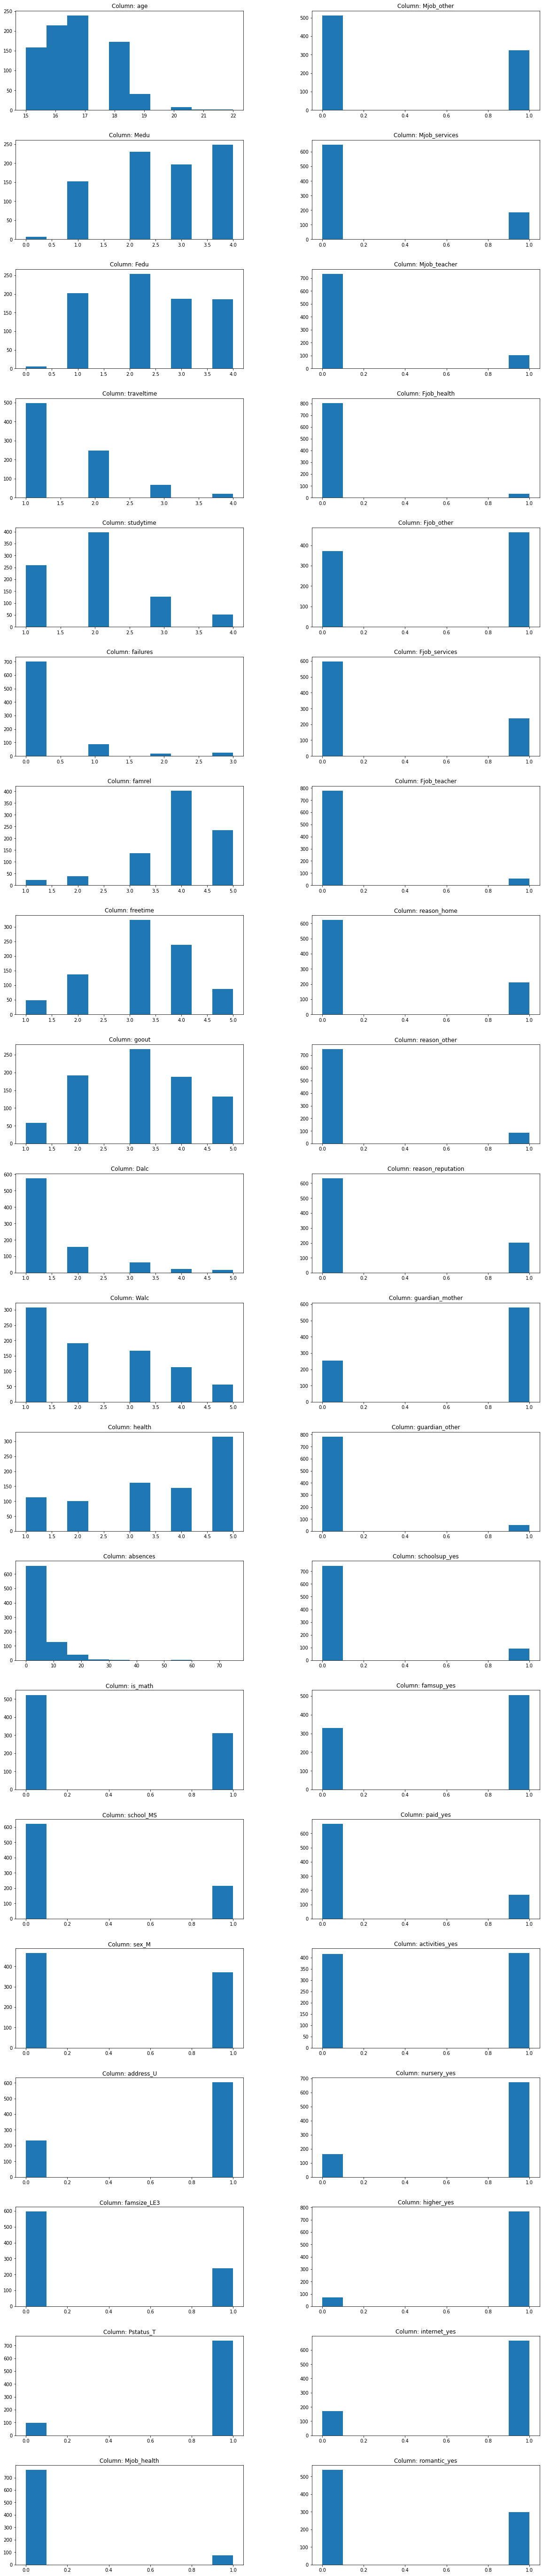

In [166]:
fig, ax = plt.subplots(len(X_plot.columns)//2, 2, figsize=(20, 100))

m=0
for i in range(2):
    for j in range(len(X_plot.columns)//2):
        col = X_plot.columns[m]
        try:      
            X_plot[col] = pd.to_numeric(X_plot[col]) 
            X_plot.hist(column=col, ax=ax[j, i], grid=False)
            ax[j, i].set_title(f'Column: {col}') 
        except ValueError:
            X_plot[col].value_counts().plot(kind='bar', ax=ax[j, i])
            ax[j, i].set_title(f'Column: {col}') 
        m += 1

Histograms show that there are some dispoportions in data, for example:


*   In column `school` there are more *GP* values
*   In column `paid` there are more *no* values
*   In column `age` the distribution is not normal.

This may have some effects on models performance.



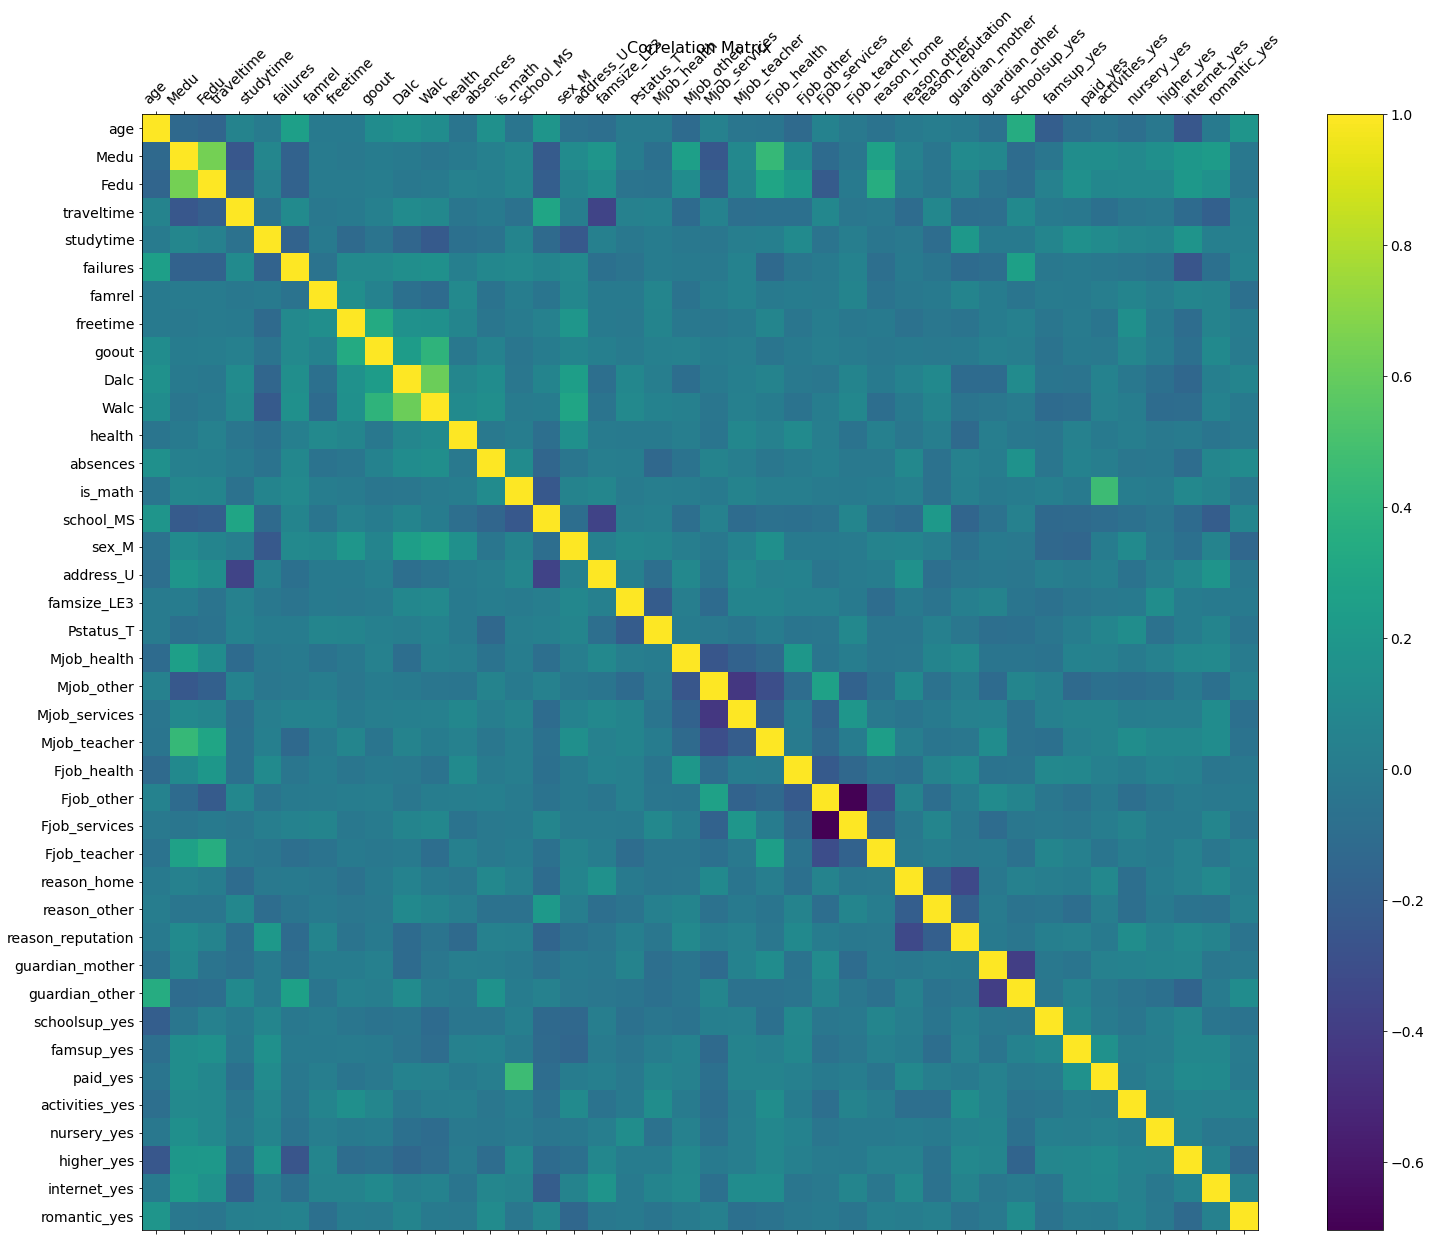

In [167]:
f = plt.figure(figsize=(25, 20))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

From the plot above we can see that columns are not very correlated with each other.

## Models

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import xgboost as xgb

### Logistic regression

In [168]:
clf = LogisticRegression(max_iter=1000000, multi_class='multinomial', penalty='l2').fit(X_train, y_train)

In [169]:
print(f'Score for training set {clf.score(X_train, y_train)}')

Score for training set 0.3520958083832335


In [186]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.29      0.45      0.36        11
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.25      0.17      0.20        18
           9       0.00      0.00      0.00        20
          10       0.15      0.26      0.19        27
          11       0.05      0.08      0.06        25
          12       0.17      0.18      0.18        22
          13       0.18      0.14      0.16        21
          14       0.18      0.27      0.21        11
          15       0.08      0.05      0.06        20
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         1

    accuracy              

Linear regression model achieved 13% f1-score on test set.

### XGBoost

In [182]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001)

In [184]:
xgb_model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.001, objective='multi:softprob')

In [189]:
pred = xgb_model.predict(X_test)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.64      0.50        11
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.29      0.33      0.31        18
           9       0.20      0.05      0.08        20
          10       0.14      0.30      0.19        27
          11       0.13      0.36      0.19        25
          12       0.00      0.00      0.00        22
          13       0.11      0.05      0.07        21
          14       0.08      0.09      0.09        11
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         1

    accuracy              

XGBoost model achieved 16% F1-score on test set.